In [4]:
from netCDF4 import *
import matplotlib.pyplot as plt
import matplotlib.colors as co
import matplotlib.ticker as ticker
from path import Path
import pandas as pd
import xarray as xr
import numpy as np
import math
import scipy.interpolate as interp
import scipy.stats as stats
import tkinter as tk
import os

from matplotlib import rc
font = {"family": "serif", "weight": "normal", "size": 13}
rc("font", **font)
rc("text", usetex=True)



In [5]:
def energy_fields(field_name = "fields",evolution = False,registerName = None):
    
    imax = 400
    if evolution :
        rangei = range(0,imax,1)
    else :
        rangei = [10,imax]
          
    dict_df = {}

    energies = []
    enstrophies = []
    vorticities = []
    ies = []

    fig, axs = plt.subplots(4, 1, figsize=(8, 6),sharex=True)

    #For each dataset
    for r,i in enumerate(rangei):
        if os.path.exists(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)) :
            #import field
            
            path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\ux")
            with open(path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

            data_lines = lines[1:]
            datax = [list(map(float, line.split())) for line in data_lines]

            size = int(math.sqrt(len(datax)))

            fieldx = np.zeros((size, size))

            for x in range(size):
                for y in range(size):
                    fieldx[x, y] = datax[x * size + y][2]

            path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\uy")
            with open(path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

            data_lines = lines[1:]
            datay = [list(map(float, line.split())) for line in data_lines]

            size = int(math.sqrt(len(datay)))

            fieldy = np.zeros((size, size))

            for x in range(size):
                for y in range(size):
                    fieldy[x, y] = datay[x * size + y][2]

            path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\"+field_name+"\\field"+str(i)+"\\omega")
            with open(path, "r") as f:
                lines = [line.strip() for line in f if line.strip()]

            data_lines = lines[1:]
            datao = [list(map(float, line.split())) for line in data_lines]

            size = int(math.sqrt(len(datao)))

            fieldo = np.zeros((size, size))

            for x in range(size):
                for y in range(size):
                    fieldo[x, y] = datao[x * size + y][2]

            energy = np.sum(0.5 * (fieldx**2 + fieldy**2))
            energies.append(energy)


            enstrophy = np.sum(0.5 * (fieldo**2))
            enstrophies.append(enstrophy)

            vorticity = np.sum(fieldo)
            vorticities.append(vorticity)
            ies.append(i)

            dict_df.update({str(r) : [energy,enstrophy,vorticity]})

            
    # Plot
    axs[0].plot(ies,energies, '-',c = (1,0,0))
    axs[1].plot(ies,enstrophies, '-',c = (0,1,0))
    axs[2].plot(ies,vorticities, '-',c = (0,0,1))
    axs[0].set_xlabel('Iteration')
    axs[0].set_ylabel('Energy')
    axs[1].set_ylabel('Enstrophy')
    axs[2].set_ylabel('Vorticity')
    # df = pd.DataFrame(dict_df)
    # df.to_csv(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\Work\\Github\Simulation\Submesoscale simulation\\Forcing\\comparison_energy\\Energy_"+str(registerName)+".csv",index = False)


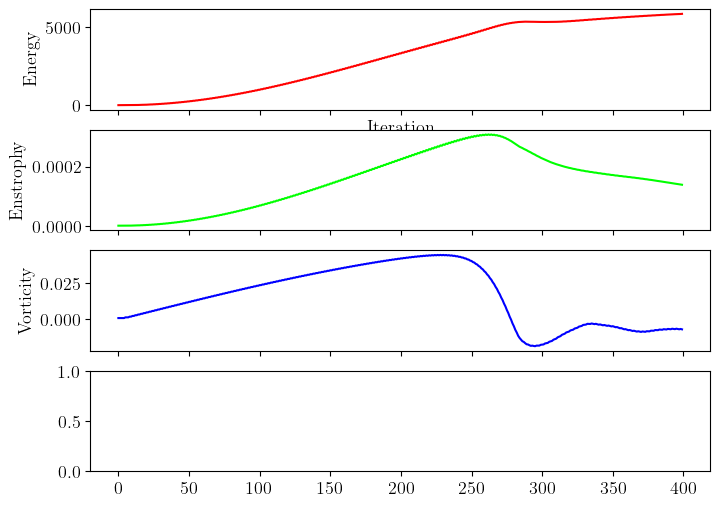

In [7]:
energy_fields("Kolmog/K25km",True,registerName="LO_CI_f86400") 
